In [ ]:
! pip install wordcloud
!pip install newspaper3k
from newspaper import Article
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
def google_authenticate():
  # Authenticate first so the Google Drive library can detect your credentials.
  from google.colab import auth
  auth.authenticate_user()

  from googleapiclient.discovery import build
  drive_service = build('drive', 'v3')
  return drive_service

drive_service = google_authenticate()

In [ ]:
def read_file(file_id):
  """ 
  Download file from Google Drive 
  Argument: file_id
  Returns: downloaded file
  """
  
  file_id = file_id

  import io
  from googleapiclient.http import MediaIoBaseDownload

  request = drive_service.files().get_media(fileId=file_id)
  downloaded = io.BytesIO()
  downloader = MediaIoBaseDownload(downloaded, request)
  done = False
  while done is False:
    # _ is a placeholder for a progress object that we ignore.
    # (Our file is small, so we skip reporting progress.)
    _, done = downloader.next_chunk()

  downloaded.seek(0)
  return downloaded
  #print 'Downloaded file contents are:', downloaded.read()

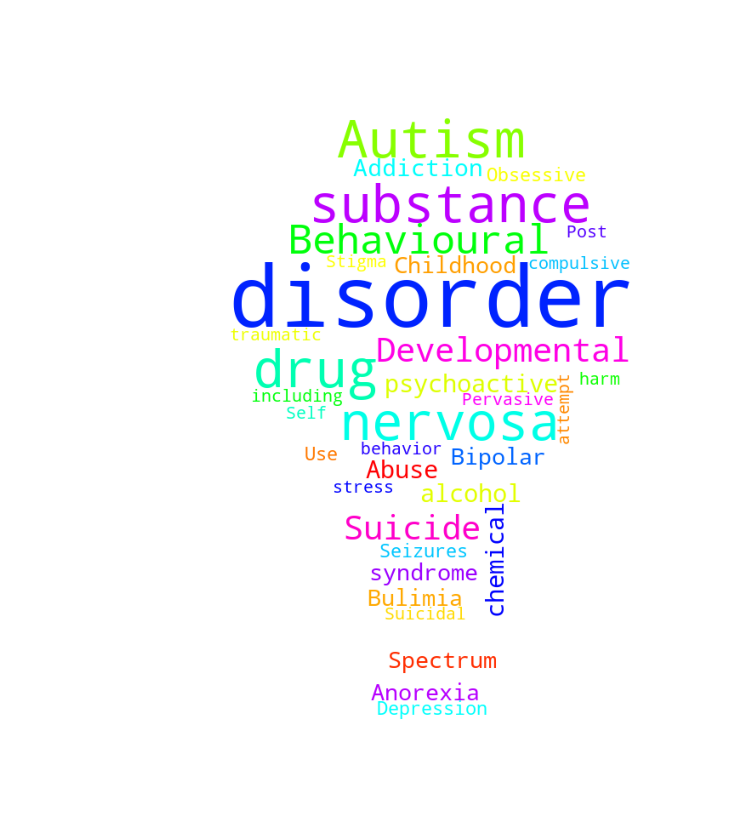

In [ ]:
image_file = read_file("1B458q9-yWjr5H0A3P3devi8YhSqFkqVf")

# create mask
alice_mask = np.array(Image.open(image_file))
text="Abuse drug alcohol chemical substance  psychoactive substance Addiction Anorexia nervosa  syndrome Autism-Spectrum Disorders Behavioural disorders Bipolar Disorder Bulimia nervosa Childhood  Depression Developmental disorder Drug Use  Disorders Seizures Obsessive-compulsive disorder Other behavioural disorders Pervasive developmental disorders including autism Post-traumatic stress disorder Self-harm Stigma Suicidal behavior Suicide Suicide attempt"

wc = WordCloud(stopwords=STOPWORDS,mask=alice_mask,
               background_color="white", collocations='false', max_words=2000,
               max_font_size=356, colormap='gist_rainbow_r',random_state=1,
               width=3000, height=2000)
wc.generate(text)
plt.imshow(wc)
plt.rcParams["figure.figsize"]=(15,15)
plt.axis('off')
plt.savefig('N.png')

